In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def get_t(labels_path):
    with open(labels_path) as f:
        training_labels = [int(x) for x in f.read().splitlines()]
    return np.array(training_labels)

In [3]:
def get_confusion_matrix(true_labels, predictions):    
    conf_matrix = np.zeros((10, 10))
    for i, predicted_class in enumerate(predictions):
        conf_matrix[true_labels[i]][predicted_class] += 1

    return conf_matrix

In [4]:
def get_x(folder_name, number_images):
    x_input_points = np.zeros((0, 784))
    for i in range(1, number_images + 1): # +1 Since it's exclusive
        img_path = '{}/{}.jpg'.format(folder_name, i)
        x_input_points = np.append(x_input_points, plt.imread(img_path).reshape(1, 784), axis=0)

    return x_input_points

In [ ]:
def gaussian(x, mean, variance):
    deno = (2 * math.pi * variance) ** 0.5
    exp = -1 * ( (x-mean)**2 / (2*variance) )
    return (1/deno) * math.exp(exp)

In [5]:
# Loading in a separate cell to avoid multiple loads.
x_delta = get_x('Train', 2400)
training_true_labels = get_t('Train/Training Labels.txt')

In [6]:
means = np.zeros((10, 784))
variances = np.zeros((10, 784))

classes_inputs = np.split(x_delta/255, 10)

for i, c in enumerate(classes_inputs):
    means[i] = np.mean(c, axis=0)
    
for i, c in enumerate(classes_inputs):
    variances[i] = np.var(c, axis=0)
    variances[i][variances[i] < 0.01] = 0.01
means.shape

(10, 784)

In [9]:
x_delta_test = get_x('Test', 200)/255
test_true_labels = get_t('Test/Test Labels.txt')

probabilities = np.ones((200, 10))
for i in range(200):
    for c in range(10):
        for f in range(784):
            probabilities[i][c] *= gaussian(x_delta_test[i][f], means[c][f], variances[c][f])

/home/abdullah/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  


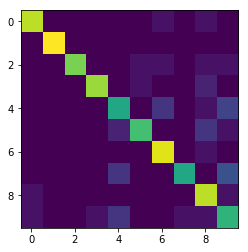

In [10]:
predictions = np.argmax(probabilities, axis=1)
conf_matrix = get_confusion_matrix(test_true_labels, predictions)
plt.imshow(conf_matrix)
plt.savefig('Confusion-naive.jpg')
